In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

In [10]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.076, 0.111) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.195, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long + seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic * local_variation

In [4]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_10T', 10, True)

Iter 1 , Loss = 1.0570183321385798 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.03117479646765 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0064905882339608 , Noise = 0.5982592105865479
Iter 4 , Loss = 0.9844215960041023 , Noise = 0.5545358061790466
Iter 5 , Loss = 0.964392035045088 , Noise = 0.5133324265480042
Iter 6 , Loss = 0.9449547618665775 , Noise = 0.47465264797210693
Iter 7 , Loss = 0.9258929254582124 , Noise = 0.43847784399986267
Iter 8 , Loss = 0.9076134699252706 , Noise = 0.40477147698402405
Iter 9 , Loss = 0.8907044570617279 , Noise = 0.3734912574291229
Iter 10 , Loss = 0.8756726702543021 , Noise = 0.3445975184440613
Iter 11 , Loss = 0.8628002544781835 , Noise = 0.3180559575557709
Iter 12 , Loss = 0.8521153370252156 , Noise = 0.2938399910926819
Iter 13 , Loss = 0.8434388947656307 , Noise = 0.27193236351013184
Iter 14 , Loss = 0.8365066374747007 , Noise = 0.2523212730884552
Iter 15 , Loss = 0.830909352527139 , Noise = 0.23498916625976562
Iter 16 , Loss = 0.82611661369787

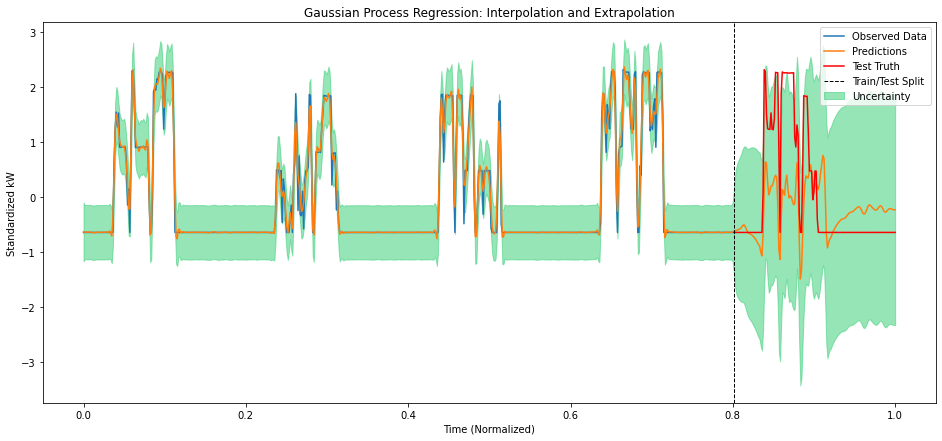

In [11]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    machine='vk_2_eg',
    update_score=False
)   

In [ ]:
mse, mape

### 30T

In [15]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [13]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1187954086354548 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0865628357118675 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0560853929274148 , Noise = 0.5982447266578674
Iter 4 , Loss = 1.0304860399699605 , Noise = 0.5544843673706055
Iter 5 , Loss = 1.0117754274215345 , Noise = 0.5132205486297607
Iter 6 , Loss = 0.9970697526120343 , Noise = 0.4744892120361328
Iter 7 , Loss = 0.9822369494545572 , Noise = 0.4383242726325989
Iter 8 , Loss = 0.9660437238736961 , Noise = 0.4047090709209442
Iter 9 , Loss = 0.9488271133747879 , Noise = 0.37357228994369507
Iter 10 , Loss = 0.931816777493602 , Noise = 0.3448084592819214
Iter 11 , Loss = 0.9169481087050633 , Noise = 0.31831008195877075
Iter 12 , Loss = 0.9058633496568383 , Noise = 0.2940017580986023
Iter 13 , Loss = 0.8982433971800282 , Noise = 0.2718595862388611
Iter 14 , Loss = 0.8920147992534244 , Noise = 0.2518974542617798
Iter 15 , Loss = 0.8857492467339861 , Noise = 0.23413120210170746
Iter 16 , Loss = 0.8797637269307

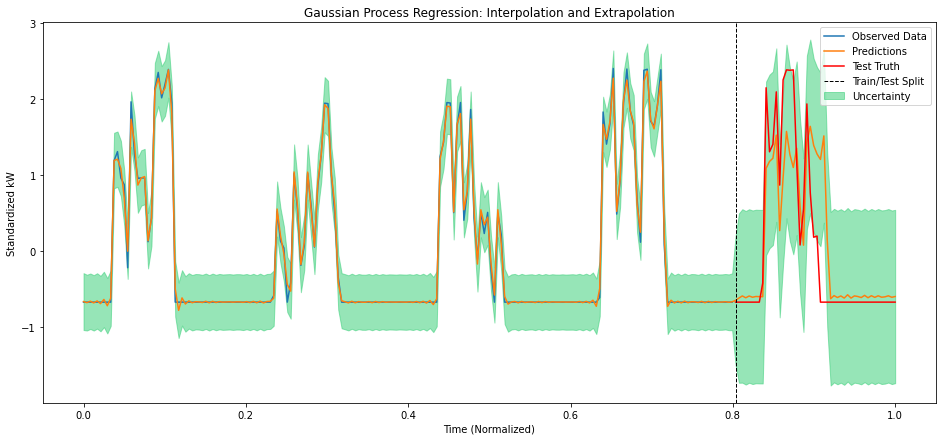

In [16]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [17]:
mse, mape

(0.4244654986824525, 0.732304612797901)